# 머신 러닝
 - 도미 데이터

# 1장 생선 분류 문제

In [5]:
# 도미(bream) 데이터 활용:
# 총 35마리의 데이터, 길이와 무게를 이용한 산점도(scatter plot) 그리기
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
                30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
                33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 
                36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
                925.0, 975.0, 950.0]

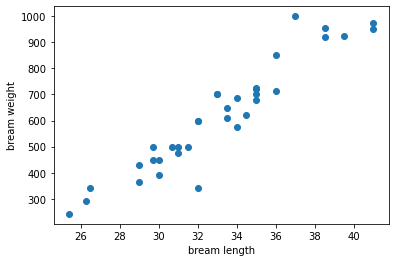

In [4]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('bream length') # x축은 길이
plt.ylabel('bream weight') # y축은 무게
plt.show()

In [6]:
# 빙어(smelt) 데이터
# 총 14마리의 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 
                12.2, 12.4, 13.0, 14.3, 15.0]

smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 
                13.4, 12.2, 19.7, 19.9]

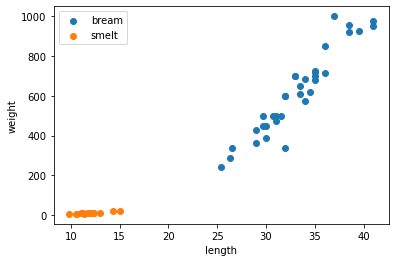

In [7]:
# 도미 데이터와 빙어 데이터 비교 (산점도)
plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [9]:
# 도미 데이터와 빙어 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 데이터 변형 (1차원 리스트 2개를 2차원 리스트로 변경)
# zip(length, weight)함수를 이용 (길이와 무게를 하나의 쌍으로 묶음)
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [10]:
# 정답 데이터(fish_target) 준비
# 생선의 길이와 무게를 이용하여 도미(1)와 빙어(0)를 구분
# 찾고자 하는 데이터(도미)를 1로 설정
# 원본 데이터: 도미 데이터-35마리의 데이터를 1로 설정, 빙어 데이터: 14마리 0
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
# kNN 모델 생성- KNeighborClaifier(n_ngighbors, ...)객체 생성
# 기본 이웃의 개수 : n_neighbors=5
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [12]:
# 모델 훈련(학습)
# fit(Training data, Target values) 함수
# fish_data와 fish_target을 이용하여 모델 훈련
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [13]:
# 모델 평가: score() 함수
# score(Test samples, Target values): 정확도의 평균값 리턴
kn.score(fish_data, fish_target)

1.0

In [14]:
# 새로운 데이터를 활용한 결과 예측: predict(X)
kn.predict([[30, 600]]) # class label 리턴(0, 1)

array([1])

In [15]:
kn.predict([[12, 50]]) # 예로 새로운 데이터를 활용한 결과: 도미

array([0])

In [16]:
# _fit_X 속성
# 훈련 데이터를 모두 가짐(fish_data)
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [17]:
# _y 속성
# fish_target을 가짐
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
# n_neighbors 값 변경(49)
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [20]:
# fish_data의 49개 중에 도미가 35개를 차지함
# 35/49의 결과와 동일
print(35/49)

0.7142857142857143


# 마무리 정리
## 정확도
#### 정확한 답을 맞춘 백분율 (0~1사이의 값)
#### 정확도 = 정확히 맞힌 개수 / 전체 데이터 개수

## KNeighborClassifier()
#### k-최근접 이웃 분류 모델
#### n_neighbors 변수에 이웃의 개수를 지정 (default값 = 5)

## fit(특성데이터, 정답데이터)
#### 모델 훈련

## score(특성데이터, 정답데이터)
#### 모델의 성능 측정

## predict(특성데이터)
#### 모델 결과 예측

In [25]:
##########################################################################

# 2장 데이터 다루기

In [21]:
# 지도 학습과 비지도 학습
# 지도 학습: 훈련을 위한 데이터(training data)와 정답이 필요
# 훈련 데이터 = 입력(input) + 정답(target)
# 알고리즘이 정답을 맞추는지 학습
# 분류, 회귀

In [22]:
# 비지도 학습: 정답(target)이 없고, 입력 데이터만 사용
# 비슷한 특징끼리 군집화
# 새로운 데이터에 대한 결과 예측
# 클러스터링(Clustering) - 데이터끼리 묶는다.

In [23]:
# 강화 학습 (대표적-알파고)
# 현재 상태에서 어떤 행동을 취하는 것이 최선인지를 학습
# {입력값-출력값}의 쌍이 정해지지 않음
# 보상(reward)을 최대화하는 방법으로 학습
## 바둑에서 승리, 주식 거래의 비용, 최종적으로 벌어들인 돈 등

In [24]:
# 훈련 세트와 테스트 세트
# 1장 모델의 문제점 - 모든 데이터를 가지고 있음: 정답을 알고 있음(정확도 100%)
# 훈련 세트와 테스트 세트 분리
## 알고리즘의 정확한 평가 - 훈련 데이터와 평가할 데이터가 달라야 됨
## 정확한 평가를 위한 데이터 세트 준비 방법: 새로운 데이터를 준비
## , 이미 준비된 데이터의 일부분을 사용

## 훈련 세트-훈련에 사용되는 데이터, 테스트 세트-평가에 사용되는 데이터

In [26]:
# 도미와 빙어 데이터를 2차원 리스트로 변경
## 총 49마리의 데이터: 도미 35마리, 빙어 14마리 / zip() 함수 사용
# 데이터 생성 - 길이와 무게를 합친 2차원 리스트 생성: fish_data
# 결과 확인을 위한 리스트 생성: fish_target
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
               475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
               575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
               920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8,
               8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [27]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)] # 2차원 리스트
fish_target = [1] * 35 + [0] * 14  #target 값 생성

In [28]:
# 훈련 세트와 테스트 세트 만들기
## fish_data, fish_target 리스트를 훈련 세트와 테스트 세트로 분리
### 훈련 세트: 35개, 테스트 세트: 14개로 분리

# 훈련 세트 구성                           # 훈련 세트 생성(35개)
## train_input: 훈련용 입력 데이터         # train_input = fish_data[:35]
## train_target: 훈련용 정답 데이터        # train_target = fish_target[:35]

# 테스트 세트 구성                         # 테스트 세트 생성(14개)
## test_input: 테스트 입력 데이터          # test_input = fish_data[35:]
## test_target: 테스트 정답 데이터         # test_target = fish_target[35:]

In [31]:
# 훈련 세트 생성(35개)
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 세트 생성(14개)
test_input = fish_data[35:]
test_target = fish_target[35:]

In [32]:
# k-최근접 알고리즘 모델 생성 및 평가하기
## 훈련 세트로 모델을 훈련
## 테스트 세트로 정확도 평가
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()   # 객체 생성
kn = kn.fit(train_input, train_target)   # 모델 훈련
kn.score(test_input, test_target)   # 테스트 세트로 평가 (정확도 출력)
# 잘못된 훈련 데이터 사용 결과 - 정확도 0.0

0.0

# Numpy를 활용한 배열 생성

In [33]:
# Numpy 사용
## 다차원 배열을 쉽게 조작할 수 있음

# 기존 fish_data와 fish_target를 Numpy 배열로 변경
## Numpy.array(list): 파이썬의 list를 Numpy의 array로 변경

In [34]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)
print(input_arr.shape)   # shape: 배열의 크기 리턴

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


In [35]:
# Numpy를 이용하여 데이터 섞기
# Numpy 사용
## random.seed(seed) : 랜덤값 생성을 위한 초기값 지정
### 초기값(seed)값이 같으면 동일한 랜덤값을 뽑을 수 있음
## Numpy.arange(stop) : stop-1까지 1의 간격으로 배열 생성
### arange: array range
## random.shuffle(x) : 배열 x(ndarray 타입)를 무작위로 섞음

In [36]:
import numpy as np

np.random.seed(42)
index_list = np.arange(49) # 0~48까지 값을 가지는 배열 생성
print(index_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [37]:
np.random.shuffle(index_list) # 배열 내용을 무작위로 섞음
print(index_list)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [38]:
# 랜덤 배열로 훈련 세트와 테스트 세트 만들기
# Numpy의 배열 인덱싱 이용
## 여러 개의 인덱스로 한 번에 여러 개의 배열 워소를 선택할 수 있음

# 훈련 세트 생성
train_input = input_arr[index_list[:35]]
train_target = target_arr[index_list[:35]]

# 테스트 세트 생성
test_input = input_arr[index_list[35:]]
test_target = target_arr[index_list[35:]]

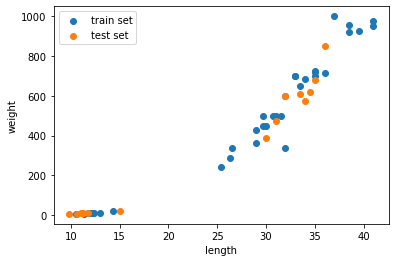

In [45]:
# 무작위로 섞인 데이터 확인하기
# 훈련 데이터와 테스트 데이터 다시 확인
import matplotlib.pyplot as plt
# [:, 0]: 모든 행에서 0번째 length, [:, 1]: 모든 행에서 1번째 weight
plt.scatter(train_input[:, 0], train_input[:, 1], label='train set')
plt.scatter(test_input[:, 0], test_input[:, 1], label='test set')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [46]:
# 두 번째 머신러닝 프로그램
# 무작위로 섞인 훈련 세트와 테스트 세트를 이용하여 k-최근접 이웃 모델 생성 및 훈련
## fit() -> score() -> predict() 호출
kn = kn.fit(train_input, train_target)
print("score: ", kn.score(test_input, test_target))

print("predict:      ", kn.predict(test_input))
print("test_target: ", test_target)  # predict 결과값과 비교를 위해 출력

score:  1.0
predict:       [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
test_target:  [0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [49]:
# 문제점 발생
# 2-1 머신러닝 프로그램의 문제점 발생
## 길이 25cm, 무게 150g인 도미를 빙어로 판단
print("predict(길이 25cm, 무게 150g): ", kn.predict([[25, 150.0]]))
# 샘플 데이터의 두 특성(길이, 무게)의 스케일이 다르기 때문
## 스케일을 조정해야 됨: 표준점수로 변환해야 됨
# 표준 점수: 평균과의 거리

predict(길이 25cm, 무게 150g):  [0]


In [50]:
# Numpy를 활용한 데이터 전처리
# column_stack()
## Numpy 제공 함수: 리스트를 일렬로 세운 다음 차례대로 연결
## python에서 제공하는 zip() 함수와 동일한 기능
### column_stack((list1, list2)): 튜플 형태로 전달
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [51]:
# ones(n), zeros(n)
## 개수(n)만큼 각각 1과 0으로 채운 배열을 생성함
print(np.ones(35))
print(np.zeros(14))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [52]:
# concatenate((a1, a2, ...))
## a1, a2 배열을 서로 연결함 (a1 배열 다음에 a2 배열 연결)
## 연결할 배열을 튜플로 전달
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [58]:
# 사이킷런으로 훈련 세트와 테스트 세트 나누기
## train_test_split() 함수 원형
#sklearn.model_selection.train_test_split(*arrays, test_size=None,
                                        #train_size=None, random_state=None,
                                        #shuffle=True, stratify=None)

In [59]:
# 사이킷런으로 훈련 세트와 테스트 세트 나누기
## 4개의 데이터 셋을 리턴
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
fish_data, fish_target, stratify=fish_target, random_state=42)

print('train_input.shape:', train_input.shape,
     'test_input.shape: ', test_input.shape)

train_input.shape: (36, 2) test_input.shape:  (13, 2)


In [60]:
print('train_target: ', train_target)

train_target:  [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [61]:
print('test_target: ', test_target)

test_target:  [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
